<a href="https://colab.research.google.com/github/hanarifdahs/hacktiv8/blob/main/h8dsft_P0W1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


**Nama : Hana Rifdah Sakinah**


---

The **Dataset** used data that contain 721 pokemon's name and the information about its types and statistics like HP, Attack, Defense, Special Attack, Special Defense and Speed. 

The fields of each data are:

*   **\#** : ID for each pokemon
*   **Name**: Name of each pokemon
* **Type 1**: Each pokemon has a type, this determines weakness/resistance to attacks
* **Type 2**: Some pokemon are dual type and have 2
* **Total**: sum of all stats that come after this, a general guide to how strong a pokemon is
* **HP**: hit points, or health, defines how much damage a pokemon can withstand before fainting
* **Attack**: the base modifier for normal attacks (eg. Scratch, Punch)
* **Defense**: the base damage resistance against normal attacks
* **SP Atk**: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
* **SP Def**: the base damage resistance against special attacks
Speed: determines which pokemon attacks first each round

The **Objective** that wanted to be achieved is analysis of the data exploration that has been carried out.

# Data Loading

**Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Read CSV dataset**

In [2]:
df = pd.read_csv('Pokemon.csv')

**Checking top 5 rows of the dataset**

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


**Checking last 5 rows of the dataset**

In [4]:
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


**Checking basic information of the dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


**Checking basic stats of the dataset**

In [6]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# Data Cleansing

###Missing Value

**Checking the total missing value in each fields**

In [7]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

**Filling missing value**

After checking up the dataset, Type 2 is not primarily need to be filled because a pokemon can also has only one type. That is why I decided to just fill in with a string 'Not Exist' that shows the pokemon does not have type 2.

In [8]:
df['Type 2'].fillna('Not Exist', inplace=True)

**Re-check the missing value**

In [9]:
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

### Change data type 

**Change data type of Type 1, Type 2, and Generation**

Changing the data type can minimize the memory size used

In [10]:
df["Type 1"] = pd.Categorical(df['Type 1'])
df["Type 2"] = pd.Categorical(df["Type 2"])
df["Generation"] = df.Generation.astype('category')

The memory reduce from 75.9+ KB to 61.2+ KB

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           800 non-null    int64   
 1   Name        800 non-null    object  
 2   Type 1      800 non-null    category
 3   Type 2      800 non-null    category
 4   Total       800 non-null    int64   
 5   HP          800 non-null    int64   
 6   Attack      800 non-null    int64   
 7   Defense     800 non-null    int64   
 8   Sp. Atk     800 non-null    int64   
 9   Sp. Def     800 non-null    int64   
 10  Speed       800 non-null    int64   
 11  Generation  800 non-null    category
 12  Legendary   800 non-null    bool    
dtypes: bool(1), category(3), int64(8), object(1)
memory usage: 61.2+ KB


**Rename Columns**

Rename columns to uppercase to make it easier in typing the columns

In [12]:
df.rename(columns = {
    'Name'  : 'NAME',
    'Type 1'  : 'TYPE 1',
    'Type 2'  : 'TYPE 2',
    'Total' : 'TOTAL',
    'Attack'  : 'ATTACK',
    'Defense' :   'DEFENSE',
    'Sp. Atk' : 'SP. ATTACK',
    'Sp. Def' : 'SP. DEFENSE',
    'Speed' : ' SPEED',
    'Generation'  : 'GENERATION',
    'Legendary' : 'LEGENDARY'
},inplace=True)

**Drop unused column**

Since I do not use the '#' column or the number of pokemon, I decided to drop it.

In [13]:
df.drop("#", axis = 1, inplace=True)

# Exploratory Data Analysis (EDA)

In [14]:
df

,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATTACK,SP. DEFENSE,SPEED,GENERATION,LEGENDARY
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,Not Exist,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


**What are the legendary pokemon?**

---

Legendary pokemon is the pokemon that has True value, then filter the legendary column equal to 1 or means true

In [15]:
df[["NAME","LEGENDARY"]][df["LEGENDARY"]==1]

,NAME,LEGENDARY
156,Articuno,True
157,Zapdos,True
158,Moltres,True
162,Mewtwo,True
163,MewtwoMega Mewtwo X,True
...,...,...
795,Diancie,True
796,DiancieMega Diancie,True
797,HoopaHoopa Confined,True
798,HoopaHoopa Unbound,True


**What is the average of legendary pokemon total stats?**

---
Total field is the sum of all stats. So if we want to find the average of the legendary pokemon total stats, we need to filter the legendary that equals 1 or true then use mean function to know the average from total column


In [57]:
leg = df.query("LEGENDARY == 1").TOTAL.mean()
round(leg)

637

**How many legendary pokemon in each generation?**

---

To know the legendary pokemon in each generation, we need to group by the generation and filter the legendary column equal to 1 or true. Lastly, use aggregate function which is sum to add all of the value in each generation.

In [17]:
legend_plot = df.query("LEGENDARY == 1").groupby("GENERATION")["LEGENDARY"].sum()
legend_plot

GENERATION
1     6
2     5
3    18
4    13
5    15
6     8
Name: LEGENDARY, dtype: int64

Then plot it to a bar plot using matplotlib, we can see that generation 3 has the most legenedary pokemon.

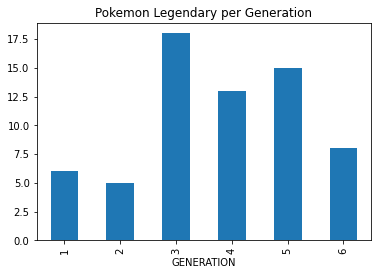

In [31]:
plt.title("Pokemon Legendary per Generation")
legend_plot.plot(kind = "bar")


**The list of the strongest to weakest pokemon**

---

The strongest pokemon can be define from the total field. To see the list of it we just need to sort the total value by descending means showing the biggest value on the total field.

In [19]:
df.sort_values(by = 'TOTAL',ascending=False)

,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATTACK,SP. DEFENSE,SPEED,GENERATION,LEGENDARY
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
164,MewtwoMega Mewtwo Y,Psychic,Not Exist,780,106,150,70,194,120,140,1,True
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
422,KyogrePrimal Kyogre,Water,Not Exist,770,100,150,90,180,160,90,3,True
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...
13,Caterpie,Bug,Not Exist,195,45,30,35,20,20,45,1,False
288,Wurmple,Bug,Not Exist,195,45,45,35,20,30,20,3,False
446,Kricketot,Bug,Not Exist,194,37,25,41,25,41,25,4,False
322,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False


**The strongest pokemon per generation**

---
To find the strongest pokemon per generation we just need to group by generation column and use aggregate function which is max from the total column.


In [32]:
strongest = df.groupby("GENERATION").max()['TOTAL']
strongest

GENERATION
1    780
2    700
3    780
4    720
5    700
6    700
Name: TOTAL, dtype: int64

To see the strongest pokemon which means has the highest total value, we query the total that has 780,700, and 720 value

In [48]:
df.query('TOTAL == 700 or TOTAL == 780 or TOTAL == 720')

,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATTACK,SP. DEFENSE,SPEED,GENERATION,LEGENDARY
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,MewtwoMega Mewtwo Y,Psychic,Not Exist,780,106,150,70,194,120,140,1,True
268,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
409,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
413,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
418,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
420,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
494,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
552,Arceus,Normal,Not Exist,720,120,120,120,120,120,120,4,True


Text(0.5, 1.0, 'The Highest Stats per Generation')

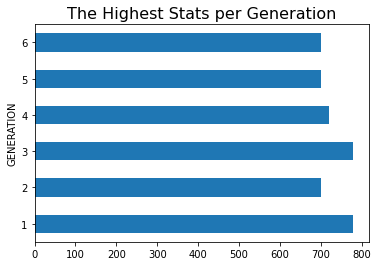

In [47]:
ax = strongest.plot(kind = "barh")
ax.set_title("The Highest Stats per Generation", fontsize = 16)

From the bar we can see that the strongest or pokemons that have the highest stats per generation is in generation 1 and 3 which are **MewtwoMega Mewtwo X, MewtwoMega Mewtwo Y, and RayquazaMega Rayquaza**

**Which generation that have strong pokemons the most?**

---

We can calculate the average total value in each generation to see which generation is the strongest or have many strong pokemons

GENERATION
1    426.813253
2    418.283019
3    436.225000
4    459.016529
5    434.987879
6    436.378049
Name: TOTAL, dtype: float64


Text(0.5, 1.0, 'Average Total Stats Per Generation')

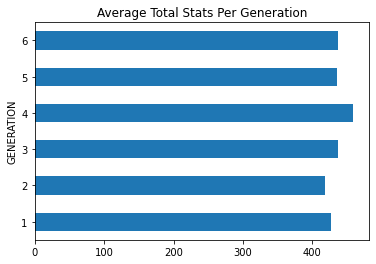

In [55]:
# df.iloc[:,[1,-2,4]].groupby('Generation')['Total'].mean()
rata = df.groupby('GENERATION').mean()['TOTAL']
print(rata)
rata.plot(kind  = 'barh')
plt.title('Average Total Stats Per Generation')

From the graphic above, we can see that **generation 4 has the most strong pokemon**  

# Summary

From the exploratory that has been conducted above, there are some conclusions that we take, which are

1. The average total value of the legendary pokemon is **637**. It includes the Hit Points, attack and special attack point, defense and special defense point, and speed.
2. The most generation that has legendary pokemon is **the third generation** with 18 pokemons.
3. The strongest pokemon is in the first and third generation which are **MewtwoMega Mewtwo X, MewtwoMega Mewtwo Y, and RayquazaMega Rayquaza**
4. The fourth generation has the most strong pokemon out of all generation